### Optimizing Deterministic Quadratic Functions (Theta = 0)

Assume that the objective function is 
$$
E(x,y)=
\left[\begin{array}{l}x-x_0 & y-y_0\end{array}\right]
R
\left[\begin{array}{l}x-x_0 \\ y-y_0\end{array}\right]
$$

where 

$$
\begin{array}{l}
&R = Q \Lambda Q^T \\
&\Lambda = \left[\begin{array}{ll}
\lambda_1 & 0 \\
0 & \lambda_2
\end{array}\right]\\
&Q = \left[\begin{array}{ll}
cos(\theta) & sin(\theta) \\
-sin(\theta) & cos(\theta)
\end{array}\right]\\
\end{array}
$$

In [2]:
import numpy as np
import math
x0 = 0
y0 = 0
lambda_1 = 1
lambda_2 = 10
theta = 0
Q = np.array([[math.cos(theta), math.sin(theta)],
              [-math.sin(theta), math.cos(theta)]])
Lambda = np.array([[lambda_1, 0],
              [0, lambda_2]])
R = np.matmul(np.matmul(Q,Lambda), Q.T)

In [3]:
xs=np.arange(-4,4,0.1)
ys=np.arange(-4,4,0.1)
E = np.ndarray([len(xs),len(ys)])
for i,x in enumerate (xs):
    for j,y in enumerate(ys):
        p = np.array([x,y])
        E[i,j] = np.matmul(np.matmul(p, R), np.transpose(p))
X, Y = np.meshgrid(xs, ys)

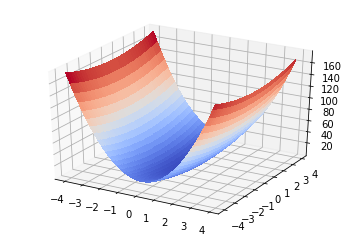

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, E, \
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

## Minimization using Gradient descent

We have:
    $$\nabla{E}=2 R \left[\begin{array}{l} x\\ y \end{array}\right]$$

The update rule for the gradient descent algorithm is:

$$\left[\begin{array}{l}x^{new}\\y^{new}\end{array}\right] = 
\left[\begin{array}{l}x^{old}\\y^{old}\end{array}\right]
- 2\mu R \left[\begin{array}{l} x^{old}\\ y^{old} \end{array}\right]$$

### The gradient descent algorithm

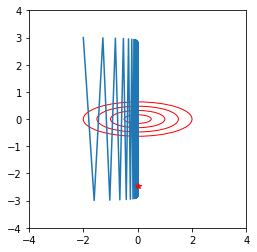

-5.220188107470532e-10
-2.4606216573800577


In [9]:
from matplotlib.patches import Ellipse
T = 100
x = np.zeros([T])
y = np.zeros([T])

x[0] = -2
y[0] = 3

max_learning_rate = 1.0 / max(lambda_1, lambda_2)
mu = max_learning_rate * 0.999
#mu = 0.005

for i in range (1,T):
    x[i] = x[i-1] - 2 * mu * (R[0,0]*x[i-1] + (R[0,1]+R[1,0])/2*y[i-1])
    y[i] = y[i-1] - 2 * mu * (R[1,1]*y[i-1] + (R[0,1]+R[1,0])/2*x[i-1])

ax = plt.subplot(111, aspect='equal')
for scale in np.arange (5):
    width = scale / np.sqrt(lambda_1)
    height = scale / np.sqrt(lambda_2)
    e = Ellipse((x0, y0), width, height, -theta * 180 / np.pi
           , facecolor = 'none', edgecolor = 'r')
    ax.add_artist(e)

plt.plot(x,y)
plt.plot(x[-1],y[-1], '*r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
print(x[T-1])
print(y[T-1])